# 1. Perkenalan


| # | Details |
| --- | --- |
| Name | Marwan Musa |
| Dataset | Dataset of Real & Fake Job Postings on [kaggle.com](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction) |
| Objective | "Predict the job postings are real or fake" |

# 2. Import Libraries

In [35]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common Imports
import os
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig as save_fig
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import pathlib
from tqdm import tqdm
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

# Text Preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# For Model
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Bidirectional, GlobalAveragePooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import AveragePooling1D, MaxPooling1D, Conv1D
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split

# Imaging
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Evaluate Regression Models
from sklearn.metrics import accuracy_score, classification_report

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [36]:
# Checking Tensorflow version
tf.__version__

'2.9.1'

In [37]:
# Checking Keras version
keras.__version__

'2.9.0'

# 3. Data Loading

In [38]:
# Data Loading & Data Head
data = pd.read_csv('fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [39]:
# Data Tail

data.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [40]:
# Copy data original

data_copy = data.copy()

# 4. Data Cleaning

### Drop Unuseful Variable

In [41]:
# We will not use customerID for analysis, so we will delete it
data.drop('job_id', axis = 1, inplace = True)

### Data Shape (Num of Rows and Columns) & Data Type

In [42]:
# Shape Data
print("Data Shape : ", data.shape)

Data Shape :  (17880, 17)


In [43]:
# Check Dataset columns type, missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15185 non-null  object
 7   benefits             10670 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

Dari `data.info()` di atas, dapat dilihat bahwa 
- Terdapat beberapa variabel yang memiliki *missing values* 
- *RangeIndex* yaitu dari $0$ hingga $17879$ data entri
- Terdapat $2$ data type yaitu integer dan object.

Untuk cleaning data missing value ini akan dilakukan saat data text eksplorasi dilakukan.

# 5. Exploratory Data Analysis

## General Exploratory

### Explore the Categorical Features

In [44]:
# Inisialisasi fitur kategorik
categorical_features = [feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['fraudulent']))]

# length each feature
for feature in categorical_features:
    print('Fitur {} ini memiliki values kategori sebanyak {}'.format(feature,len(data[feature].unique())))

print("Banyak categorical featrues :",len(categorical_features))

Fitur title ini memiliki values kategori sebanyak 11231
Fitur location ini memiliki values kategori sebanyak 3106
Fitur department ini memiliki values kategori sebanyak 1338
Fitur salary_range ini memiliki values kategori sebanyak 875
Fitur company_profile ini memiliki values kategori sebanyak 1710
Fitur description ini memiliki values kategori sebanyak 14802
Fitur requirements ini memiliki values kategori sebanyak 11969
Fitur benefits ini memiliki values kategori sebanyak 6206
Fitur employment_type ini memiliki values kategori sebanyak 6
Fitur required_experience ini memiliki values kategori sebanyak 8
Fitur required_education ini memiliki values kategori sebanyak 14
Fitur industry ini memiliki values kategori sebanyak 132
Fitur function ini memiliki values kategori sebanyak 38
Banyak categorical featrues : 13


- Terdapat 13 fitur kategorik
- Fitur description adalah fitur kategorik dengan varian value terbanyak. Fitur ini juga digunakan sebagai `variabel utama` / `variabel bebas` untuk dilakukan *text classification modelling* untuk mini-research project kali ini.

### Categorical Features Distribution

Text(0.5, 1.0, 'Employment Type and Fraudulent Correlation')

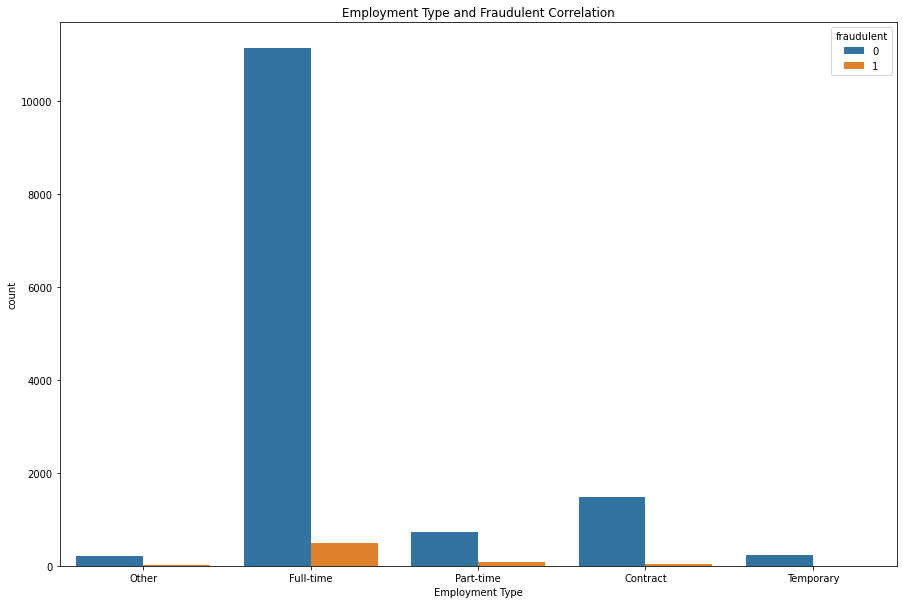

In [45]:
#check count based on Employment Type
plt.figure(figsize = (15,10), facecolor = 'white')
sns.countplot(x = "employment_type", hue = "fraudulent", data = data)
plt.xlabel("Employment Type")
plt.title("Employment Type and Fraudulent Correlation")

- Full-time job adalah tipe pekerjaan yang paling banyak terdata
- Pekerjaan yang paling banyak terupdate sebagai fake job posting adalah `Full-time` job. Walaupun jika dibandingkan dengan real job postingnya, fake job posting dengan employment type `Full_time` ini sangat sedikit.

Text(0.5, 1.0, 'Required Experience and Fraudulent Correlation')

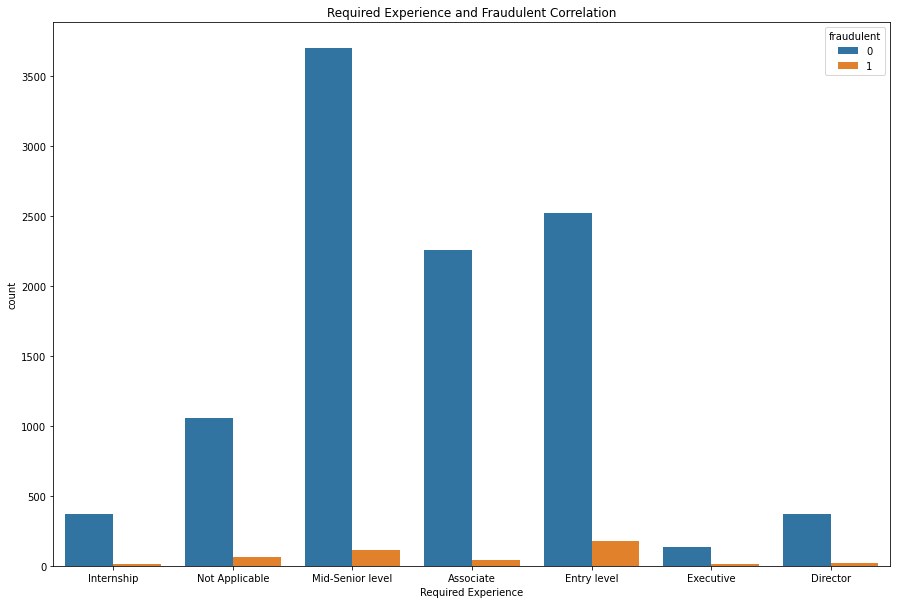

In [46]:
#check count based on Required Experience
plt.figure(figsize = (15,10), facecolor = 'white')
sns.countplot(x = "required_experience", hue = "fraudulent", data = data)
plt.xlabel("Required Experience")
plt.title("Required Experience and Fraudulent Correlation")

- Berdasarkan `required experience`, fake job posting paling banyak terdapat di *entry level* dan *mid senior level*
- Level *executive* dan *internship* menjadi `required experience` yang paling sedikit terupdate fake job postings.

Text(0.5, 1.0, 'Required Education and Fraudulent Correlation')

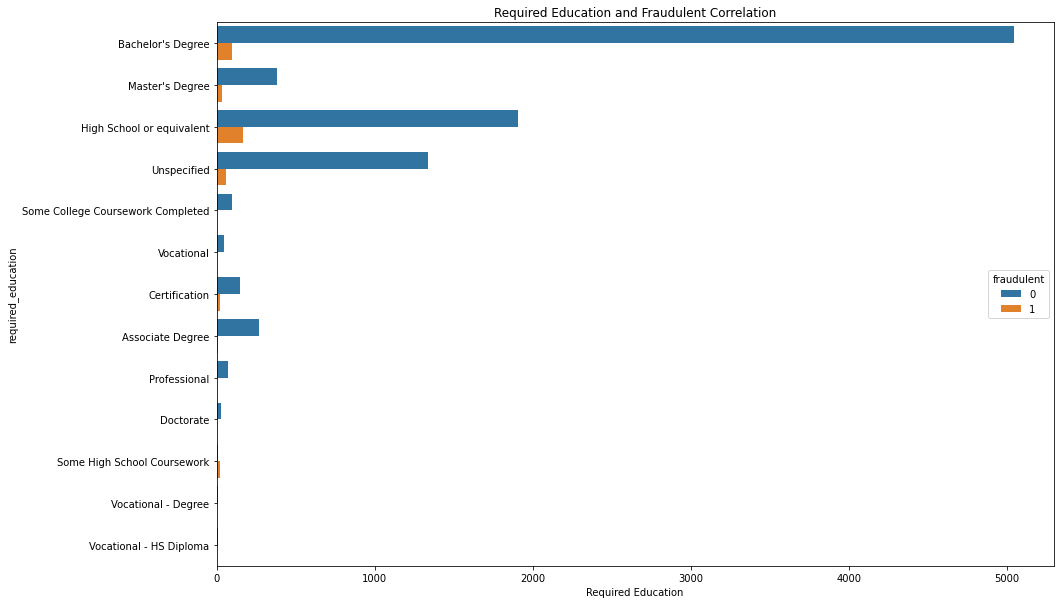

In [47]:
#check count based on Required Education
plt.figure(figsize = (15,10), facecolor = 'white')
sns.countplot(y = "required_education", hue = "fraudulent", data = data)
plt.xlabel("Required Education")
plt.title("Required Education and Fraudulent Correlation")

- `required education` *high-school or equivalent* adalah yang paling banyak terupdate fake job postings, kemudian *bachelors degree*.

### Explore the Numerical Features

In [48]:
# list of numerical variables
numerical_features = data.select_dtypes(exclude='object').columns
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  4


,telecommuting,has_company_logo,has_questions,fraudulent
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,1,0


### Numerical Features Distribution and Anomaly

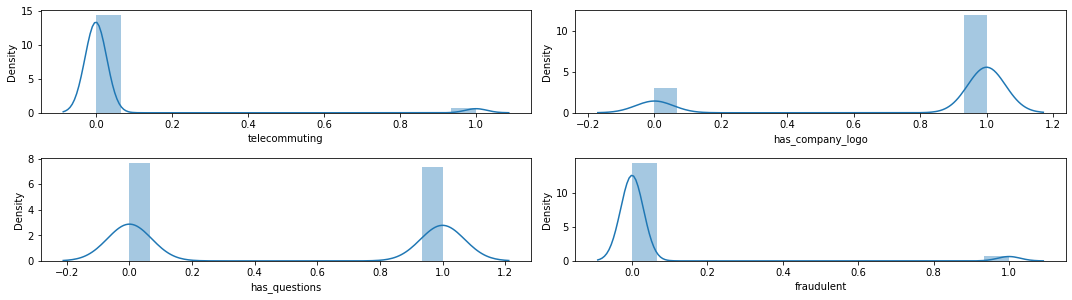

In [49]:
# Visualizing data distribution with distplot 
x = plt.figure(figsize=(15, 10))

for i, j in enumerate(numerical_features):
    x.add_subplot(5, 2, i+1)
    sns.distplot(data[j], bins=15)
    x.tight_layout()

plt.tight_layout()

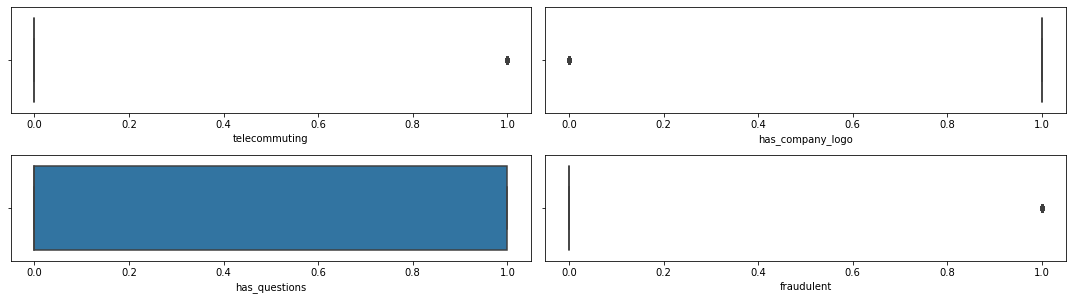

In [50]:
# Visualizing data distribution with boxplot // checking outliers
x = plt.figure(figsize=(15, 10))
for i, j in enumerate(numerical_features):
    x.add_subplot(5, 2, i+1)
    sns.boxplot(data[j])
    x.tight_layout()
plt.tight_layout()

- Rata-rata semua variabel numerikal terdistribusi skew
- `has_questions` variabel memiliki 2 peak dengan nilai density yang hampir sama di $0$ dan $1$
- Semua variabel numerikal memiliki outliers kecuali `has_questions`, namun jika dilihat secara seksama, 4 variabel numerikal ini sejatinya merupakan kategorikal variabel dalam bentuk numerik.

###  Relation between Numerical Features and Target Feature

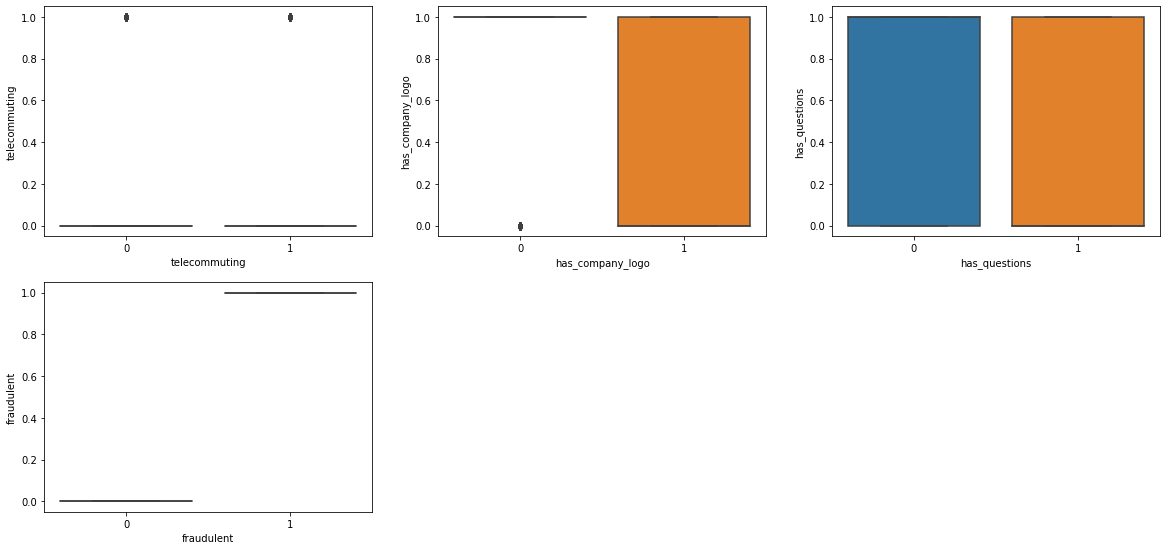

In [51]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in numerical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(x = "fraudulent", y = data[feature], data = data)
    plt.xlabel(feature)
    plotnumber += 1
plt.show()

Dari distribusi variabel `has_company_logo`, terlihat bahwa untuk class `fraudulent` = $0$ (atau postingan job bersifat real) sebagian besar company yang memasang iklan memiliki logo company (atau `has_company_logo` sebagian besar bernilai $1$).

### Correlation between Numerical Features

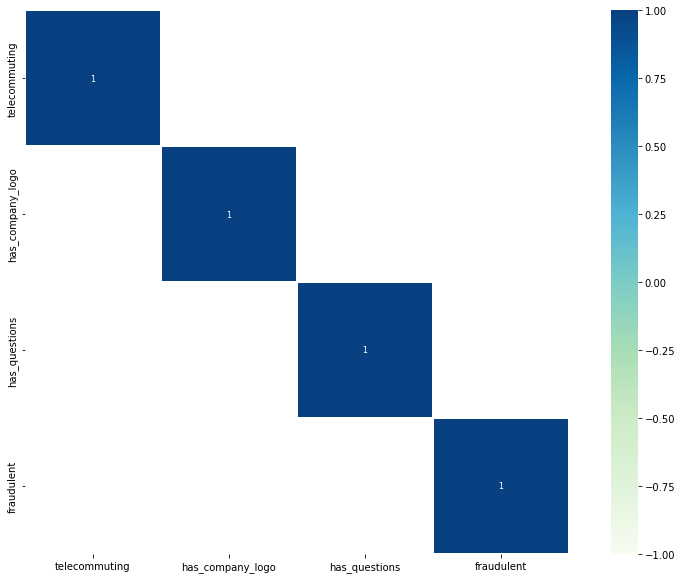

In [52]:
# Checking for correlation by heatmap
corr = data[numerical_features].corr() 
plt.figure(figsize=(15, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='GnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Berdasarkan heatmap corr di atas, tidak ada variabel yang berkorelasi satu sama lain (nilai korelasinya berada di range $-0.4$ hingga $0.5$). 

## Text Exploratory

Kali ini, akan digunakan column `description`, `requirements`, dan `fraudulent` untuk mengeksplorasi data lebih lanjut, maka **Text Exploratory** akan dilakukan dengan hanya menggunakan tiga variabel tersebut.

In [53]:
# Helper function untuk generate random colors
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

### Data to use

In [54]:
# Filtering use data
df = data[['description', 'requirements', 'fraudulent']]
df.head()

,description,requirements,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0
1,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0
2,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0
3,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0


### Check Missing Values

In [55]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   17879 non-null  object
 1   requirements  15185 non-null  object
 2   fraudulent    17880 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 419.2+ KB


Terdapat missing values di variabel `description` dan `requirements`. Selanjutnya, akan dilakukan drop terhadap missing values tersebut.

In [56]:
# drop missing values
df.dropna(inplace = True)

# reset index
df.reset_index(drop = True, inplace = True)

In [57]:
# data infor after dropna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15185 entries, 0 to 15184
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   15185 non-null  object
 1   requirements  15185 non-null  object
 2   fraudulent    15185 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 356.0+ KB


### Check Target Variable Distribution

In [58]:
temp = df.groupby('fraudulent').count()['description'].reset_index().sort_values(by='description',ascending=False)
temp.style.background_gradient(cmap='GnBu')

,fraudulent,description
0,0,14473
1,1,712


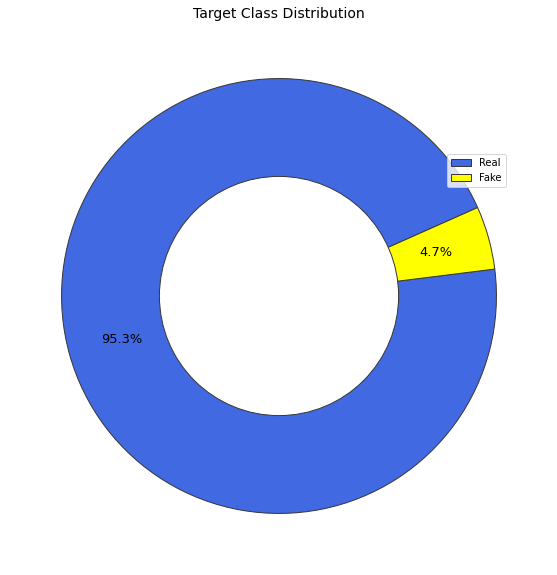

In [59]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# Color Setting
colors = ['royalblue', 'yellow']
tcolor_dict = {
    True : "royalblue",
    False : "yellow"
}
mycmp = LinearSegmentedColormap.from_list("MyCmp", ['#8EBAD9', '#FFFFFF', '#FFF56D'], N=100)
# Plot a pie chart to check if we have class imbalance problem
fig, ax = plt.subplots(figsize=(15,10))
ax.pie(x = df["fraudulent"].value_counts(), autopct="%1.1f%%",
        pctdistance=.75, startangle=24, textprops={"fontsize":13},
        colors=colors, wedgeprops={'edgecolor':'#383838'});
ax.set_title("Target Class Distribution", fontdict={'fontsize':14})
ax.legend(['Real', 'Fake'], bbox_to_anchor=(.8, .77))

centre_circle = plt.Circle((0,0),0.55,fc='white', ec='#383838')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

Terdapat imbalance data di variabel target, dengan rasio sekitar 9 banding 1, karena untuk `class fake job` (atau `fraudulent` bernilai = 1) hanya terdapat $712$ data dari sekitar $15$ ribu data.

### Number of Words in Each Description and Requirements

In [60]:
# Number of words in description and requirements
train = df.copy()
train['Num_words_desc'] = train['description'].apply(lambda x:len(str(x).split())) # Number of words in description
train['Num_words_req'] = train['requirements'].apply(lambda x:len(str(x).split())) # Number of words in requirements
train['difference_in_words'] = train['Num_words_desc'] - train['Num_words_req'] # Difference in Number of words description & requirements

In [61]:
# Top 5 Number of words in description
train.sort_values(by = 'Num_words_desc', ascending = False).head()

,description,requirements,fraudulent,Num_words_desc,Num_words_req,difference_in_words
5690,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes- MSc....,1,1183,116,1067
12214,“We believe our best investment is in our peop...,1 year to 6 months minimum Recruiting experience,0,1101,8,1093
6800,Ookla Account Executives have the authority an...,Willingness to gain a complete understanding o...,0,1072,128,944
1039,Our client (TCH) is an acute care teaching hos...,In order to be eligible for this role you must...,0,954,22,932
4718,The EatAds team is growing and we are now seek...,Min. Working ExperienceBachelor degree or 3 ye...,0,931,57,874


Dari tabel di atas, dapat disimpulkan bahwa jumlah kata paling banyak dalam satu `job posting` untuk `description` berjumlah $1183$ kata.

In [62]:
# Bottom 5 Number of words in description
train.sort_values(by = 'Num_words_desc', ascending = False).tail()

,description,requirements,fraudulent,Num_words_desc,Num_words_req,difference_in_words
10312,#NAME?,Qualifications-Vocational training/Diploma in ...,0,1,55,-54
2604,#NAME?,- BA/BS degree or equivalent practical experi...,0,1,101,-100
6596,#NAME?,Minimum 2 years of full time solid experience ...,0,1,53,-52
10554,#NAME?,"-Bachelor of Science Degree in soil science, c...",0,1,26,-25
800,,Responsibilities:Duties and Responsibilities:M...,1,0,269,-269


In [63]:
# Top 5 Number of words in requirements
train.sort_values(by = 'Num_words_req', ascending = False).head()

,description,requirements,fraudulent,Num_words_desc,Num_words_req,difference_in_words
4149,North and South Island locations.We require sp...,Our client based in the far North of NZ is see...,0,20,1645,-1625
153,We are seeking Registrar's in Psychiatry for a...,At least 12 months experience at Registrar Lev...,0,13,939,-926
10926,We require Specialists and Senior Registrars f...,FACEM Emergency (ED) Consultant - QLDFACEM nee...,0,16,860,-844
498,GENERAL DESCRIPTION OF POSITION The Maintenan...,QUALIFICATIONS To perform this job successful...,0,375,858,-483
883,Great Salary on offer.Expand your Aneasthetics...,The Position For this position they are seekin...,0,31,815,-784


Dari tabel di atas, dapat disimpulkan bahwa jumlah kata paling banyak dalam satu `job posting` untuk `requirements` berjumlah $1645$ kata.

In [64]:
# Bottom 5 Number of words in requirements
train.sort_values(by = 'Num_words_req', ascending = False).tail()

,description,requirements,fraudulent,Num_words_desc,Num_words_req,difference_in_words
2265,Opening For Dermatologist Doctor in QatarWe th...,Dermatology,0,90,1,89
1803,"We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,144,1,143
9633,We are currently looking for passionate Senior...,#NAME?,0,83,1,82
3854,".NET Developer Aya Healthcare - San Diego, CA...",,0,191,0,191
5486,We are looking for skilled photographers to jo...,,0,377,0,377


In [65]:
# cek unvalid value / description
train[train['description'] == '#NAME?'].shape[0], train[train['requirements'] == '#NAME?'].shape[0]

(7, 36)

Jumlah kata paling sedikit dalam data description adalah sebanyak $0$ dan $1$. Sedangkan `description` dan `requirements` dengan karakter `#NAME?` ini hanya berjumlah $7$ dan $36$. Jadi untuk `description` dan `requirements` dengan value `#NAME?` akan di drop.

In [66]:
# Filtering data
train = train.query("description != '#NAME?' and requirements != '#NAME?'")

### Distribution of Number of Words

In [67]:
# Create distplot with custom bin_size

hist_data = [train['Num_words_desc'], train['Num_words_req']]
group_labels = ['Description', 'Requirements']

fig = ff.create_distplot(hist_data, group_labels, show_curve = False)
fig.update_layout(title_text = 'Distribution of Number Of words')
fig.update_layout(autosize = False,
                  width = 900,
                  height = 700,
                  paper_bgcolor = "LightSteelBlue",)
fig.show()

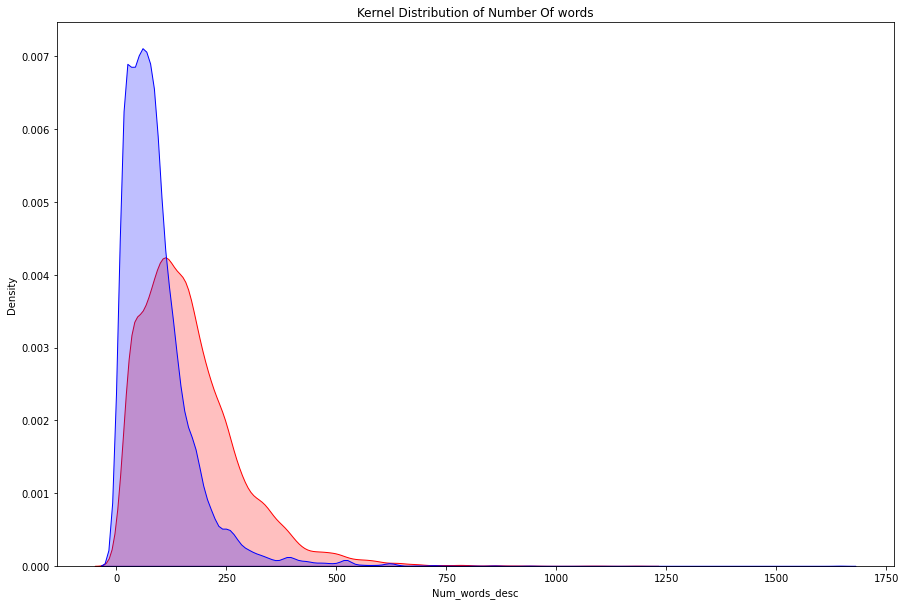

In [68]:
# Create distplot with kernel
plt.figure(figsize=(15,10))
p1=sns.kdeplot(train['Num_words_desc'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(train['Num_words_req'], shade=True, color="b")

Dari plot ini, dapat disimpulkan bahwa jumlah kata di variabel `description` dan `requirements` terdistribusi skew.

### Number of Words Distribution Comparison by Fraudulent

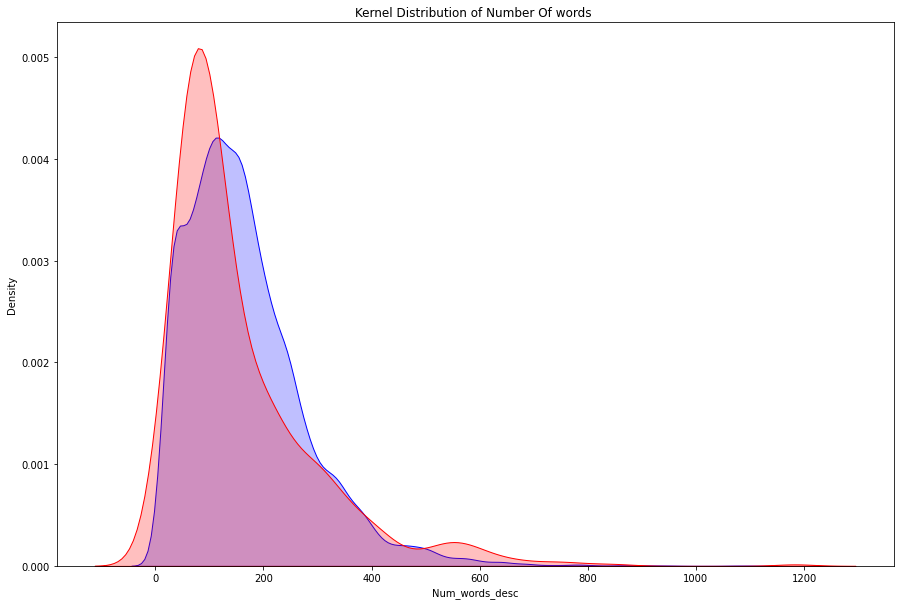

In [69]:
# Create distplot with kernel
plt.figure(figsize=(15,10))
p1=sns.kdeplot(train[train['fraudulent'] == 0]['Num_words_desc'], shade=True, color="b").set_title('Kernel Distribution of Number Of words ')
p2=sns.kdeplot(train[train['fraudulent'] == 1]['Num_words_desc'], shade=True, color="r")

`Fake job posting` berdasarkan `description` memiliki density jumlah kata tertinggi di range $0$ hingga $200$ kata.

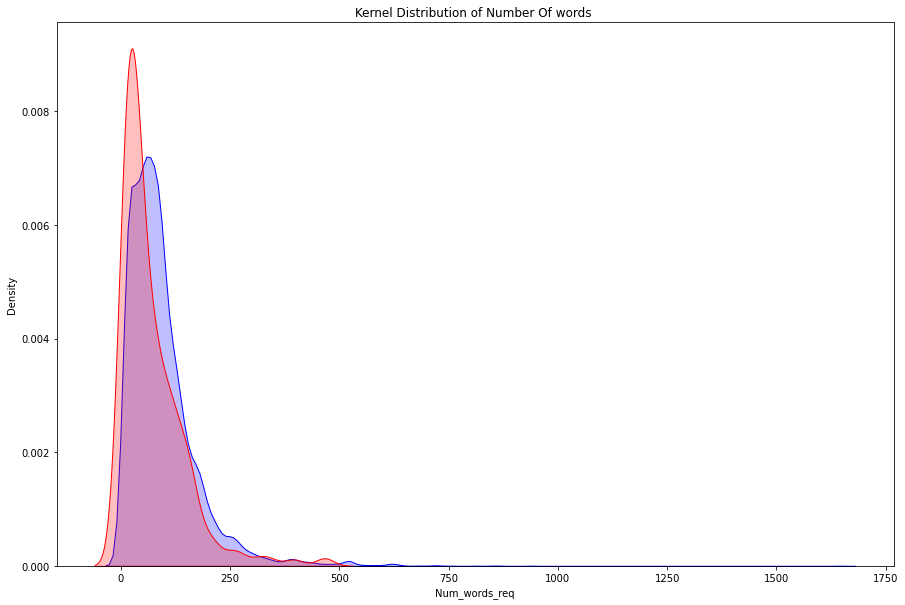

In [70]:
# Create distplot with kernel
plt.figure(figsize=(15,10))
p1=sns.kdeplot(train[train['fraudulent'] == 0]['Num_words_req'], shade=True, color="b").set_title('Kernel Distribution of Number Of words ')
p2=sns.kdeplot(train[train['fraudulent'] == 1]['Num_words_req'], shade=True, color="r")

Hampir sama seperti behaviour distribusi data di variabel `description`, `Fake job posting` berdasarkan `requirements` memiliki density jumlah kata tertinggi di range $0$ hingga $200$ kata.

## Extracting Information Out of Words in Features

Sebelum mengekstraksi informasi dari fitur `description` dan `requirements` kita akan melakukan cleaning text data terlebih dahulu.

### Case Folding

> - Menghilangkan tanda baca / yang bukan huruf
- Ubah teks ke lower case
- Menghilangkan karakter yang tidak diperlukan
- Menghilangkan Stopwords
- Stemming

*Case folding ini bertujuan untuk menyeragamkan karakter pada data.*

#### **Berikut ini akan di simulasikan tiga langkah *case folding* diatas :**

#### *Menghilangkan Karakter Selain Huruf*

In [71]:
# Checking first data
print(train.description[0])

Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff


In [72]:
# Drop symbol
teks = train['description'][0]
teks_punc = re.sub("[^A-Za-z\s']"," ", teks)
teks_punc

'Food    a fast growing  James Beard Award winning online food community and crowd sourced and curated recipe hub  is currently interviewing full  and part time unpaid interns to work in a small team of editors  executives  and developers in its New York City headquarters Reproducing and or repackaging existing Food   content for a number of partner sites  such as Huffington Post  Yahoo  Buzzfeed  and more in their various content management systemsResearching blogs and websites for the Provisions by Food   Affiliate ProgramAssisting in day to day affiliate program support  such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR  amp  Events when neededHelping with office administrative work  such as filing  mailing  and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff'

#### *String to Lower Case*

In [73]:
# ubah teks ke lower case
teks_punc = teks_punc.lower()
teks_punc

'food    a fast growing  james beard award winning online food community and crowd sourced and curated recipe hub  is currently interviewing full  and part time unpaid interns to work in a small team of editors  executives  and developers in its new york city headquarters reproducing and or repackaging existing food   content for a number of partner sites  such as huffington post  yahoo  buzzfeed  and more in their various content management systemsresearching blogs and websites for the provisions by food   affiliate programassisting in day to day affiliate program support  such as screening affiliates and assisting in any affiliate inquiriessupporting with pr  amp  events when neededhelping with office administrative work  such as filing  mailing  and preparing for meetingsworking with developers to document bugs and suggest improvements to the sitesupporting the marketing and executive staff'

#### *Menghilangkan Stopwords*

In [74]:
# Menghilangkan kata-kata yang ada dalam list stopwords-english
nltk.download('stopwords')
tp_split = teks_punc.split()
teks_punc = ' '.join([word for word in tp_split if word not in stopwords.words('english')])
teks_punc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


'food fast growing james beard award winning online food community crowd sourced curated recipe hub currently interviewing full part time unpaid interns work small team editors executives developers new york city headquarters reproducing repackaging existing food content number partner sites huffington post yahoo buzzfeed various content management systemsresearching blogs websites provisions food affiliate programassisting day day affiliate program support screening affiliates assisting affiliate inquiriessupporting pr amp events neededhelping office administrative work filing mailing preparing meetingsworking developers document bugs suggest improvements sitesupporting marketing executive staff'

Jadi Kesimpulannya adalah case folding dilakukan untuk membersihkan data text dari karakter yang tidak diinginkan agar lebih mudah di analisis oleh model. Untuk proses *case folding* di atas (dari menghilangkan karakter selain huruf hingga menghilangkan *stopwords*) masih dalam tahap `cleaning`, karena kita masih akan menganalisis *most common words* yang ada di `description` dan `requirements`.

Akan dilakukan `stemming` jika sudah masuk di tahap modelling. 

### Most Common Words

In [75]:
# Fungsi untuk clean data
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower() # Membuat text menjadi lower case
    text = re.sub('\[.*?\]', '', text) # Menghilangkan text dalam square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) # menghilangkan links
    text = re.sub('<.*?>+', '', text) # Menghilangkan text dalam <>
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # menghilangkan punctuatuion 
    text = re.sub('\n', '', text) # Menghilangkan enter / new line
    text = re.sub('\w*\d\w*', '', text) # Menghilangkan karakter yang terdiri dari huruf dan angka
    return text

In [76]:
# Applying clean_text function to data
train['description'] = train['description'].apply(lambda x:clean_text(x))
train['requirements'] = train['requirements'].apply(lambda x:clean_text(x))

In [77]:
# Menghilangkan stopwords
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

#### *Most Common Words in Description*

In [78]:
# Splitting and stopwords removing
train['temp_list_desc'] = train['description'].apply(lambda x:str(x).split())
train['temp_list_desc'] = train['temp_list_desc'].apply(lambda x:remove_stopword(x))

In [79]:
# Word counting
top = Counter([item for sublist in train['temp_list_desc'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,work,11231
2,business,8894
3,new,8270
4,customer,8086
5,sales,7589
6,company,7438
7,looking,7407
8,development,6732
9,product,6313
10,experience,6143


In [80]:
# Barplot
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Description', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [81]:
# Tree of most common words
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

Dari sini bisa dilihat bahwa, dalam fitur `desciption` ini 5 kata yang paling banyak muncul adalah `work`, `business`, `new`, `customer`, dan `sales`.

#### *Most Common Words in Requirements*

In [82]:
# Splitting and stopwords removing
train['temp_list_req'] = train['requirements'].apply(lambda x:str(x).split())
train['temp_list_req'] = train['temp_list_req'].apply(lambda x:remove_stopword(x))

In [83]:
# Word counting
top1 = Counter([item for sublist in train['temp_list_req'] for item in sublist])
temp1 = pd.DataFrame(top1.most_common(20))
temp1 = temp1.iloc[1:,:]
temp1.columns = ['Common_words','count']
temp1.style.background_gradient(cmap='Blues')

,Common_words,count
1,skills,9952
2,work,9685
3,years,7322
4,ability,6796
5,knowledge,5917
6,communication,5425
7,degree,4730
8,required,4699
9,management,4683
10,working,4663


In [84]:
# Barplot
fig1 = px.bar(temp1, x="count", y="Common_words", title='Commmon Words in Requirements', orientation='h', 
             width=700, height=700,color='Common_words')
fig1.show()

In [85]:
# Tree of most common words
fig1 = px.treemap(temp1, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig1.show()

Dari sini diperoleh bahwa, dalam fitur `requirements` ini 5 kata yang paling banyak muncul adalah `skills`, `work`, `years`, `ability`, dan `knowledge`. 

Sehingga bisa disimpulkan bahwa kebutuhan `skills` yang mumpuni, pengalaman kerja atau `work` experience at `years`, kemampuan atau  `ability`, serta pengetahuan atau `knowledge` dalam pekerjaan yang dilamar sangat berpengaruh dalam proses *recruitment*.

#### *Most common words Fraudulents Wise*

Selanjutnya akan dianalisis *most common words* berdasarkan fraudulents (*real* atau *fake job posting*).

In [86]:
# filtering
real_post = train[train['fraudulent'] == 0]
fake_post = train[train['fraudulent'] == 1]

In [88]:
# Most common words on real post description
top = Counter([item for sublist in real_post['temp_list_desc'] for item in sublist])
temp_real = pd.DataFrame(top.most_common(20))
temp_real.columns = ['Common_words','count']
temp_real.style.background_gradient(cmap='Greens')

,Common_words,count
0,team,14134
1,work,10417
2,business,8565
3,new,7983
4,customer,7717
5,sales,7419
6,looking,7074
7,company,7070
8,development,6520
9,product,6024


In [89]:
# Barplot
fig = px.bar(temp_real, x="count", y="Common_words", title='Most common words on Real Post Description', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [90]:
# Tree of most common words
fig = px.treemap(temp_real, path=['Common_words'], values='count',title='Tree Of Most common words on Real Post Description')
fig.show()

Untuk `real job posting description`, kata-kata yang paling banyak muncul adalah `team`, `work`, `business`, `new` , `customer` dan lain-lain.

---

In [91]:
# Most common words on fake post description
top = Counter([item for sublist in fake_post['temp_list_desc'] for item in sublist])
temp_fake = pd.DataFrame(top.most_common(20))
temp_fake.columns = ['Common_words','count']
temp_fake.style.background_gradient(cmap='Greens')

,Common_words,count
0,work,814
1,amp,522
2,team,417
3,project,398
4,position,393
5,customer,369
6,company,368
7,management,360
8,engineering,337
9,experience,336


In [92]:
# Barplot
fig = px.bar(temp_fake, x="count", y="Common_words", title='Most common words on Fake Post Description', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [93]:
# Tree of most common words
ig = px.treemap(temp_fake, path=['Common_words'], values='count',title='Tree Of Most common words on Fake Post Description')
fig.show()

Untuk `fake job posting description`, kata-kata yang paling banyak muncul adalah `work`, `amp`, `temp`, `project` , `position` dan lain-lain.

### Wordclouds

Untuk *insight* yang lebih jelas dari data, akan dilakukan visualization with wordcloud.

#### *Wordcloud of Real Post Description*

In [62]:
# Collecting all words in the description
text_realdesc = " ".join(desc for desc in real_post.description)
print ("There are {} words in the combination of all real post description.".format(len(text_realdesc)))

There are 16219190 words in the combination of all real post description.


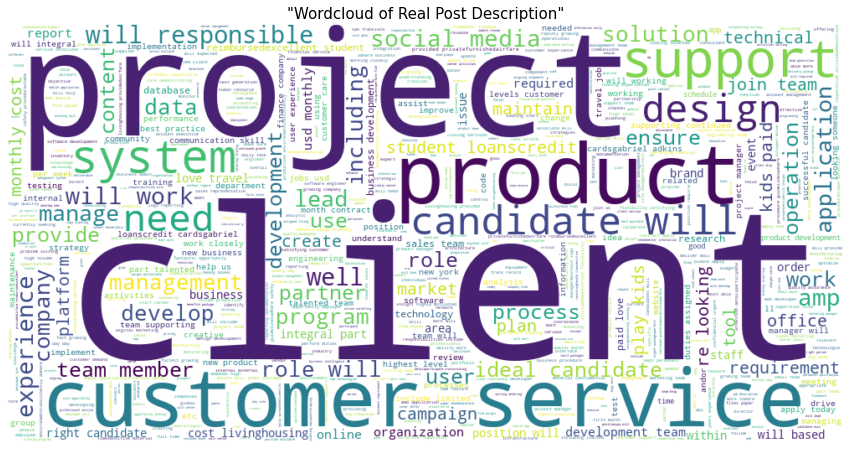

In [63]:
# Generate wordcloud
wordcloud = WordCloud(background_color='white',
                stopwords = set(STOPWORDS),
                max_words = 1000,
                random_state = 42,
                width=1000, 
                height=500)
wordcloud.generate(text_realdesc)

# display the word cloud
plt.figure(figsize = (15,10), facecolor = 'white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('"Wordcloud of Real Post Description"', fontsize = 15)
plt.show()

#### *Wordcloud of Fake Post Description*

In [64]:
# Collecting all words in the description
text_fakedesc = " ".join(desc for desc in fake_post.description)
print ("There are {} words in the combination of all fake post description.".format(len(text_realdesc)))

There are 16219190 words in the combination of all fake post description.


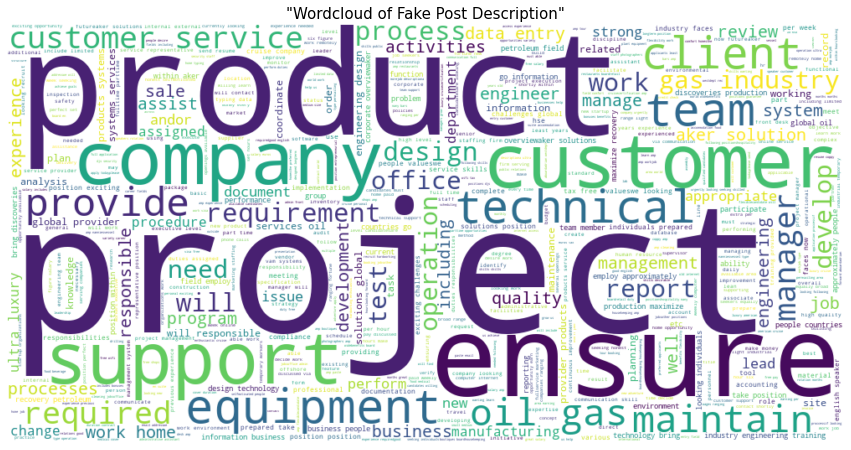

In [65]:
# Generate wordcloud
wordcloud = WordCloud(background_color='white',
                stopwords = set(STOPWORDS),
                max_words = 1000,
                random_state = 42,
                width=1000, 
                height=500)
wordcloud.generate(text_fakedesc)

# display the word cloud
plt.figure(figsize = (15,10), facecolor = 'white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('"Wordcloud of Fake Post Description"', fontsize = 15)
plt.show()

Dari dua wordcloud di atas, terlihat bahwa dari beberapa kata yang ter-*highlight* berdasarkan algoritma `wordcloud`, yang paling berbeda adalah kata `client` di ***real post description*** dan kata `ensure` di ***fake post description***.

# 6. Data Preprocessing

### *Get Data for Model Inference*

Dari eksplorasi data, diperoleh value unvalid `#NAME?` di variabel `description` dan `requirements`, maka value tersebut akan dihilangkan dari data.

In [66]:
# Filtering data
data = data.query("description != '#NAME?'")

Drop value `#NAME?` hanya dilakukan di variabel `description` karena hanya variabel tersebut yang akan digunakan sebagai fitur untuk modelling.

In [67]:
# Get Data for Model Inference

data_inf = data.sample(20, random_state = 0)

In [68]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)

In [69]:
# Reset Index

data_train_test.reset_index(drop = True, inplace = True)
data_inf.reset_index(drop = True, inplace = True)

### *Feature Selection*

In [70]:
# Choosing columns for modeling
# description as feature, fraudulent as target
mod_data = data_train_test[['description', 'fraudulent']]

### *Handling Missing Values*

In [71]:
# Check Missing Values on mod_data

mod_data.isnull().sum()

description    1
fraudulent     0
dtype: int64

In [72]:
# drop missing value
mod_data.dropna(inplace = True)
mod_data.reset_index(drop = True, inplace = True)

### *Cleaning Data*

In [73]:
# Get the Independent Features
X = mod_data.drop('fraudulent',axis=1)

# Get the Dependent features
y = mod_data['fraudulent']

In [74]:
# Applying clean_text function to data
uncleaned_corpus = X.copy()
uncleaned_corpus['description'] = uncleaned_corpus['description'].apply(lambda x:clean_text(x)) # Fungsi clean.text telah di definisikan di EDA section

In [75]:
# Defining corpus with cleaned data
ss = SnowballStemmer(language='english') 
corpus = []
for i in range(0, len(uncleaned_corpus)):
  decsr = uncleaned_corpus['description'][i]
  decsr = decsr.split()  # splitting data
  decsr = [ss.stem(word) for word in decsr if not word in stopwords.words('english')] # steeming setiap huruf dengan pengecualian kata yang ada dalam stopwords
  decsr = ' '.join(decsr)
  corpus.append(decsr)

Pada umumnya, biasanya steemer yang digunakan adalah `PorterSteemer`, Numun untuk project kali ini digunakan `SnowballSteemer` karena merupakan pengembangan dari steemer originalnya yaitu `PorterSteemer`

```
Martin Porter (who invented the Porter Stemmer or Porter algorithm in 1980) also created Snowball Stemmer. The method utilized in this instance is more precise and is referred to as “English Stemmer” or “Porter2 Stemmer.” It is somewhat faster and more logical than the original Porter Stemmer.
```

In [76]:
# defining corpus to dataframe
X['corpus'] = corpus
X.reset_index(inplace=True)

### *Feature Encoding*

In [77]:
#defined vocabulary size 
voc_size = 5000

# Encoding corpus with tf.one_hot encoder
enc_corps = [one_hot(words, voc_size) for words in corpus] 

In [78]:
# Checking len corpus and enc_corps
print(len(enc_corps[0]))
print(len(corpus[0].split(' ')))

76
76


### *Splitting Data*

In [79]:
# Split between `X` final (Features) and `y` final (Target)

X_trains, X_test, y_trains, y_test = train_test_split(X['corpus'], np.array(y), test_size=0.2, random_state = 0)

### *Tokenization*

In [80]:
# Embedding corpus after encoded with equal lenght = 40
descr_length = 40 # set maximum length of all sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab = tokenizer.word_index

# Only top num_words-1 most frequent words will be taken into account. Only words known by the tokenizer will be taken into account.
X_trains_word_idx = tokenizer.texts_to_sequences(X_trains) 
X_test_word_idx = tokenizer.texts_to_sequences(X_test)

# padding sequences
X_trains_padded_seqs = pad_sequences(X_trains_word_idx, maxlen = descr_length)
X_test_padded_seqs = pad_sequences(X_test_word_idx, maxlen = descr_length)

`pad-sequences` digunakan untuk memastikan semua sequences dalam list memiliki lenght yang sama. 

### *Define Validation Set*

In [81]:
# Mengambil data dari X_trains untuk dijadikan sebagai data validasi
X_train, X_val = X_trains_padded_seqs[:11000], X_trains_padded_seqs[11000:]
y_train, y_val = y_trains[:11000], y_trains[11000:]

# 7. Model Defining

### *Building Pipeline*

In [82]:
# Setting Autotune
AUTOTUNE = tf.data.AUTOTUNE

#Building a pipeline from a data that exists in memory
training_batches = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1024).batch(64).cache().prefetch(AUTOTUNE)
validation_batches = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(64).cache().prefetch(AUTOTUNE)
testing_batches = tf.data.Dataset.from_tensor_slices((X_test_padded_seqs, y_test)).batch(64).cache().prefetch(AUTOTUNE)

Dalam pipeline di atas sudah di inisialisasi `prefetch` (*autotune* mode), `shuffle`, dan `cache` untuk mempercepat waktu pemrosesan (parallel processing mode).

Untuk data **train**, shuffle buffer size di set 1024 dan batch size diset 64. Sedangkan untuk data **testing** dan **validation**, hanya set batch size tanpa shuffeling.

In [83]:
# Creating model lstm only
embedding_vector_features = 300 # setting untuk output dimension
model = Sequential()
model.add(Embedding(len(vocab)+1, embedding_vector_features, input_length = descr_length)) # len(vocab)+1 adalah input shape, vocab variabel di inisialisasi di tokenization section
model.add(LSTM(100))        # inisialisasi model lstm dengan output dimension 100
model.add(Dropout(0.3))     # dropout layers
model.add(Dense(1, activation='sigmoid')) # output layer

model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = 'accuracy')
# loss function menggunakan binary_crossentropy karena binary classification case



print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 300)           25416900  
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 25,577,401
Trainable params: 25,577,401
Non-trainable params: 0
_________________________________________________________________
None


Untuk base model sequential ini, digunakan 4 layer 
- 1 input layer,
- 1 layer untuk inisialisasi LSTM dengan output dimension sebanyak 100
- 1 dropout layer
- 1 output(dengan fungsi activation "`sigmoid`").  

Untuk output, digunakan "`sigmoid`" activation karena target variabelnya bersiat *binary* sehingga untuk compile pun fungsi loss yang digunakan adalah "`binary_crossentropy`" dengan optimizer "`adam`".

Untuk model ini digunakan LSTM. Mengapa? karena LSTM atau Long Short-Term Memory algorithm ini sangat baik digunakan untuk meng-*classify*, *process* dan *predict* data `time-series` atau data `sequences`. Algoritma LSTM ini sngat membantu dalam proses minimalisasi `exploding and vanishing gradient problems` (sumber : referensi).

Untuk optimizer, digunakan `adam` karena merupakan  *most common use* optimizer, *convergence speed* yang cepat, merupakan gabungan dari algoritma `momentum` dan `RMSprop` optimizer, dan tidak perlu dilakukan *tuning learning rate* karena bersifat *adaptive to learning rate*.

Berdasarkan summary model ini, ada $25,577,401$ parameter yang terbentuk dengan komposisi 25,416,900  di layer embedding, $160,400$ di layer lstm, dan $101$ di layer output.

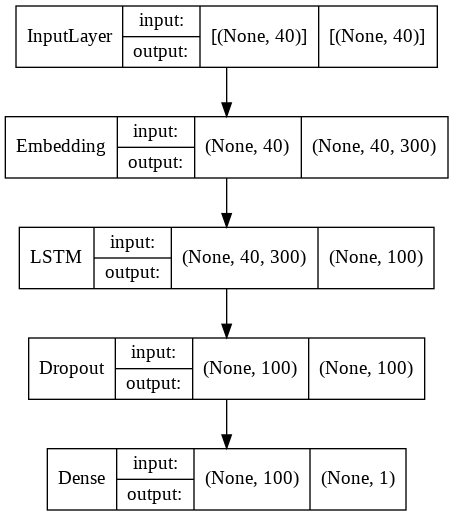

In [84]:
# plot algoritma model
plot_model(model, show_shapes = True, show_layer_names = False)

# 8. Model Training

In [85]:
# ClearSession
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Compiling model with Seq-API
model_learn = model.fit(training_batches, epochs = 100, validation_data = validation_batches)

Epoch 1/100
172/172 [==============================] - 11s 21ms/step - loss: 0.2061 - accuracy: 0.9506 - val_loss: 0.1387 - val_accuracy: 0.9625
Epoch 2/100
172/172 [==============================] - 3s 19ms/step - loss: 0.0923 - accuracy: 0.9732 - val_loss: 0.1299 - val_accuracy: 0.9674
Epoch 3/100
172/172 [==============================] - 3s 19ms/step - loss: 0.0429 - accuracy: 0.9879 - val_loss: 0.1442 - val_accuracy: 0.9543
Epoch 4/100
172/172 [==============================] - 3s 19ms/step - loss: 0.0210 - accuracy: 0.9949 - val_loss: 0.1952 - val_accuracy: 0.9442
Epoch 5/100
172/172 [==============================] - 3s 19ms/step - loss: 0.0153 - accuracy: 0.9958 - val_loss: 0.1686 - val_accuracy: 0.9582
Epoch 6/100
172/172 [==============================] - 3s 19ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.1724 - val_accuracy: 0.9652
Epoch 7/100
172/172 [==============================] - 3s 19ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.2118 - val_accuracy

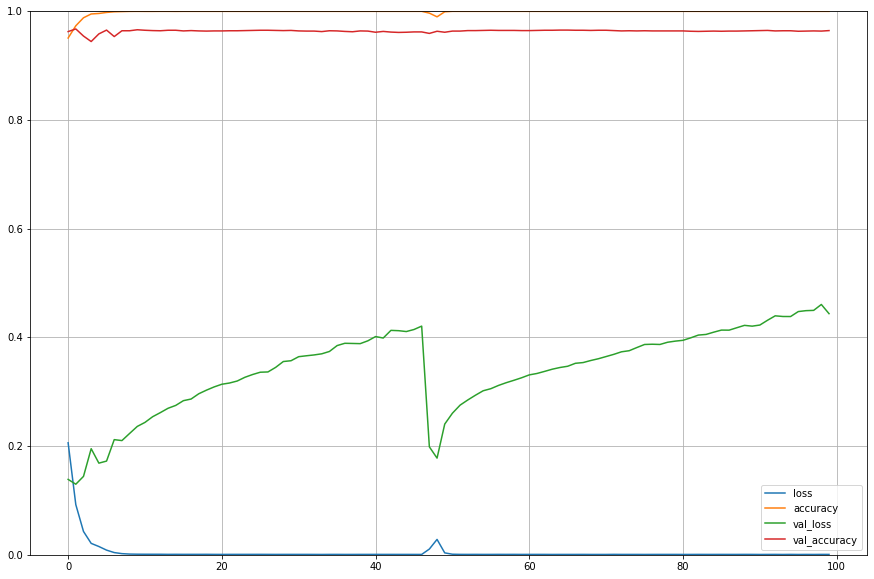

In [86]:
# Graph plot of train process model
pd.DataFrame(model_learn.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Dari grafik ini terlihat bahwa model menunjukkan performansi yang sangat baik untuk `accuracy - metric` dengan skor `accuracy` dan `val_accuracy` berada di *range* sekitar $0.9$ hingga $1.0$. Sedangkan untuk `loss`, model bekerja sangat baik di *training batches*, namun ada `loss seasonal exploding` yang terjadi di *validation batces* dengan *range* skor sekitar $0.17$ hingga $0.43$.

# 9. Model Improvement

### Defining Model Improvement

In [87]:
# creating model lstm + depths CNN
main_input = Input(shape = (descr_length, ), dtype = 'int32') # set input

# embedding
embedder = Embedding(len(vocab)+1, embedding_vector_features, input_length = descr_length)
embed = embedder(main_input)

# lstm model
lstm = LSTM(100)(embed) # inisialisasi model lstm dengan output dimension 100
lstm = Dropout(0.3)(lstm) # dropout layer

# cnn part
cnn = Conv1D(256, 5, padding='same')(embed)
cnn = MaxPooling1D(3, 3, padding='same')(cnn)
cnn = Conv1D(128, 5, padding='same')(cnn)
cnn = MaxPooling1D(3, 3, padding='same')(cnn)
cnn = Conv1D(64, 3, padding='same')(cnn)
cnn = Flatten()(cnn)
cnn = Dropout(0.1)(cnn)
cnn = BatchNormalization()(cnn)
cnn = Dense(100, activation='relu')(cnn)
cnn = Dropout(0.1)(cnn)

# concat
lstm_cnn = concatenate([lstm, cnn], axis = -1)
flat = Flatten()(lstm_cnn)  # Flattening
drop = Dropout(0.2)(flat)
main_output = Dense(1, activation='sigmoid')(drop)
model_imp = Model(inputs = main_input, outputs = main_output)

# compiling
model_imp.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# summary
print(model_imp.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      25416900    ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 40, 256)      384256      ['embedding[0][0]']              
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 14, 256)      0           ['conv1d[0][0]']                 
                                                                                              

Untuk model improvement ini, karena digunakan `lstm` dan `cnn` model dengan proses paralel learning, maka jenis model yang digunakan adalah ***functional*** dengan 19 layer yang terdiri dari :
- 1 layer input
- 1 layer embedder
- 1 layer input
- 1 layer inisialisasi lstm model dengan output 100 dimensi
- 1 layer dropout (lstm)
- 3 layer conv1D (cnn) dengan masing-masing neurons 256, 128, dan 64 
- 2 layer maxpooling1D dengan shape 3x3 (cnn)
- 1 flatten layer (cnn)
- 2 dropout (cnn)
- 1 layer batchnormalization (cnn)
- 1 dense layer dengan 100 neurons dan `relu` activation (cnn)
- 1 layer concat untuk menggabungkan `cnn` dan `lstm`
- 1 layer flatten (cnn & lstm)
- 1 layer dropout (cnn & lstm)
- 1 layer output

Hampir sama dengan `base` model sebelumnya menggunakan `LSTM`, namun untuk improvement kali ini ditambahkan `CNN`(*Convolutional Neural Network*), `CNN` ini sangat baik digunakan untuk case `Image Classification` dan `Computer Vision`. Namun, karena text data merupakan `sequential data` seperti `time series`, yang bisa diinterpretasikan sebagai `one-dimensional matrix` sehinggal data text ini bisa diproses dengan `one-dimensional convolution layer`. Oleh karena itu mengapa digunakan `Conv1d` dan `MaxPooling1D` layer dengan *same padding* agar output layer memiliki `spatial dimensions` yang sama dengan input.

`MaxPooling` ini digunakan untuk *downsampling* representasi input dengan hanya mengambil *maximum value* dari ukuran `pool_size`, sederhananya untuk *downgrading* input tanpa mengurangi kualitas data di dalamnya.

Selanjutnya, `BatchNormalization` digunakan untuk menormalisasikan setiap input ke suatu layer, membagi epochs, memberikan regularization, dan mengurangi error.

Untuk activation di dense layers, digunakan fungsi `relu` karena computationally efficient, tidak semua neuron diaktivasi saat processing jika output dari transformasi linier di suatu neuron bernilai lebih kecil dari 0, sehingga komputasinya lebih cepat. Namun, kekurangan `relu` ini jika dilakukan backpropagation process, gradient value neuron yang 0 tadi tidak akan mengupdate weight dan biasnya sehingga akan ada neuron yang tidak akan pernah teraktivasi (`dead neurons`).

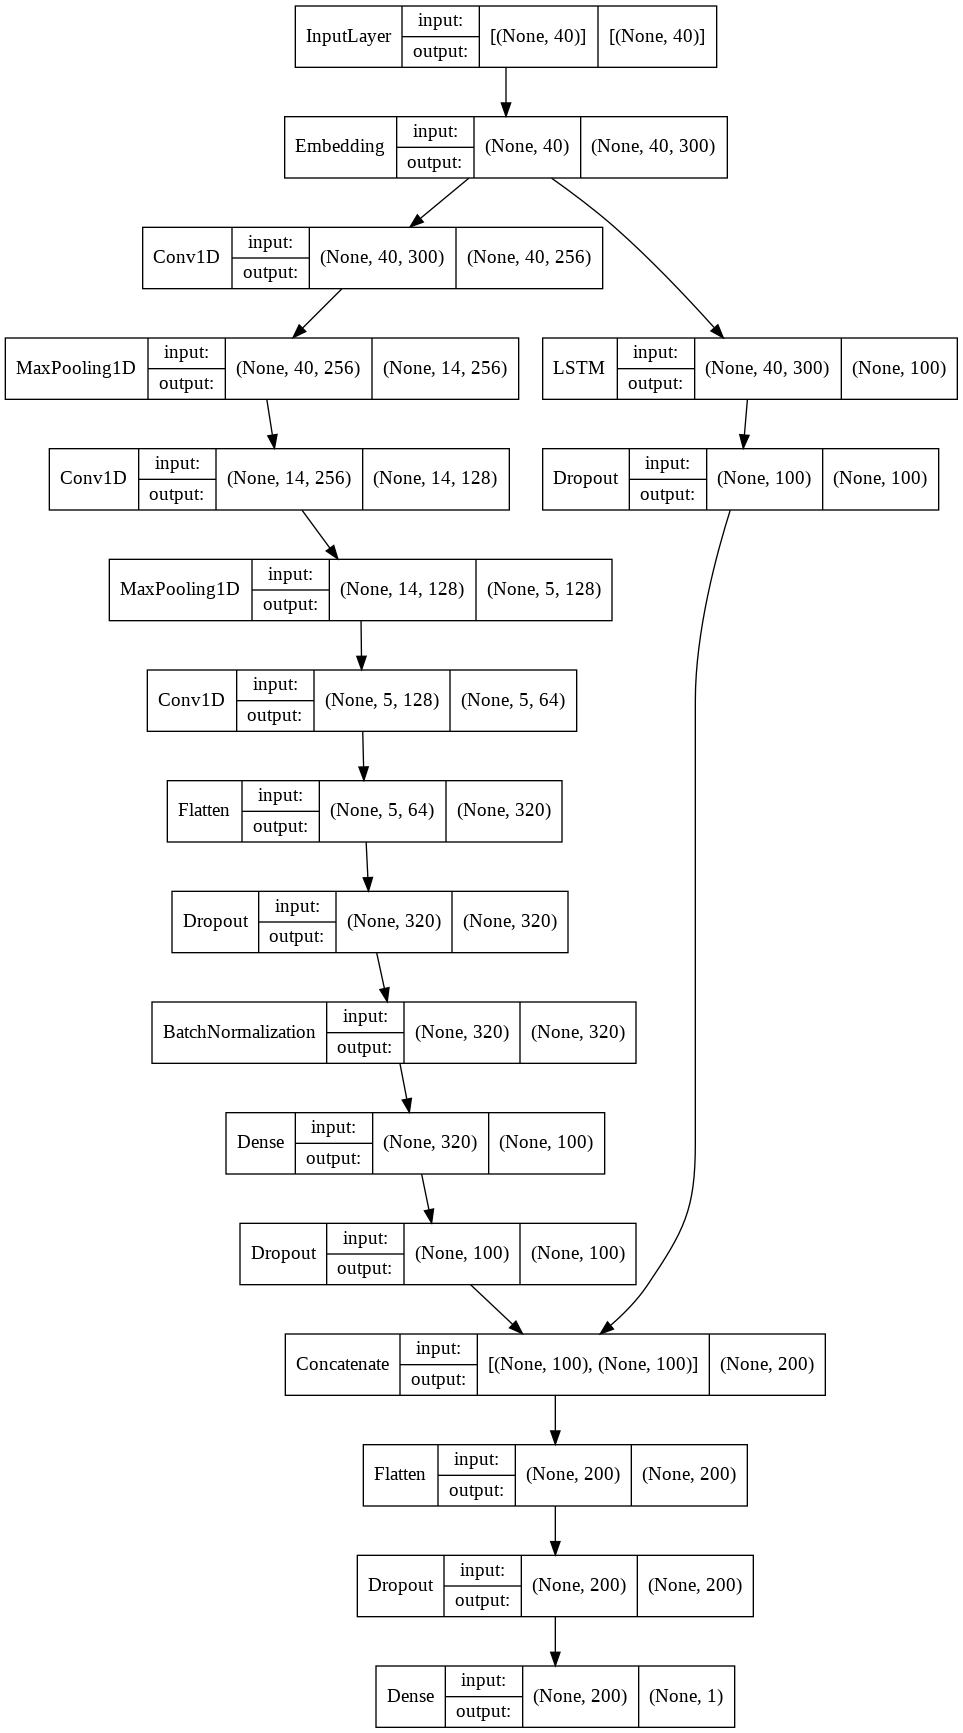

In [88]:
# plot algoritma model improvement
plot_model(model_imp, show_shapes = True, show_layer_names = False)

### Training Model Improvement

In [89]:
# ClearSession
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Compiling model with Seq-API
model_learn_imp = model_imp.fit(training_batches, epochs = 100, validation_data = validation_batches)

Epoch 1/100
172/172 [==============================] - 15s 28ms/step - loss: 0.1634 - accuracy: 0.9582 - val_loss: 0.1272 - val_accuracy: 0.9579
Epoch 2/100
172/172 [==============================] - 4s 23ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.1981 - val_accuracy: 0.9652
Epoch 3/100
172/172 [==============================] - 4s 22ms/step - loss: 0.0097 - accuracy: 0.9972 - val_loss: 0.2144 - val_accuracy: 0.9744
Epoch 4/100
172/172 [==============================] - 4s 22ms/step - loss: 0.0081 - accuracy: 0.9982 - val_loss: 0.1864 - val_accuracy: 0.9707
Epoch 5/100
172/172 [==============================] - 4s 23ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.2623 - val_accuracy: 0.9732
Epoch 6/100
172/172 [==============================] - 4s 23ms/step - loss: 0.0071 - accuracy: 0.9985 - val_loss: 0.2286 - val_accuracy: 0.9735
Epoch 7/100
172/172 [==============================] - 4s 23ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.2408 - val_accuracy

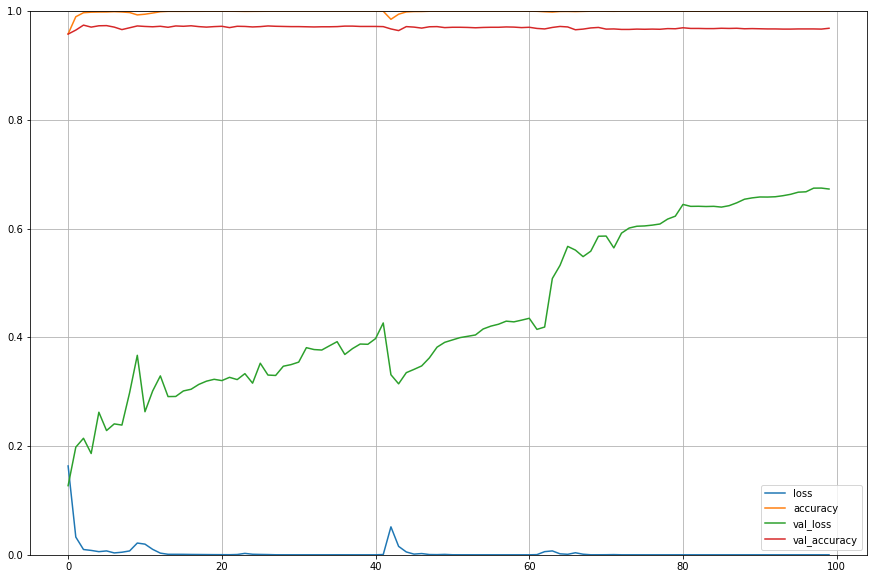

In [90]:
# Graph plot of train process model
pd.DataFrame(model_learn_imp.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Dari grafik ini terlihat bahwa model menunjukkan performansi yang sangat baik untuk `accuracy - metric` dengan skor `accuracy` dan `val_accuracy` berada di *range* sekitar $0.9$ hingga $1.0$ dengan pergerakan yang cukup stabil. Sedangkan untuk `loss`, model bekerja sangat baik di *training batches* walaupun terdapat `exploding` dengan intensitas kecil di epoch $40$ hingga $43$, namun di *validation batces* ada `loss increasing movement` dengan *range* skor sekitar $0.17$ hingga $0.63$.


Apakah ini menunjukkan bahwa `base model` dengan `loss seasonal exploding` menujukkan performansi yang lebih baik dibandingkan `improvement model` yang menghasilkan pergerakan `loss` yang meningkat seiring epoch berjalan? Mari kita analisis lebih lanjut di model evaluation.

# 10. Model Evaluation

### *Classification Report on Train Set*

In [91]:
# predicting
y_pred = model.predict(X_train)
y_pred_imp = model_imp.predict(X_train)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred_imp = np.where(y_pred_imp > 0.5, 1, 0)

# Classification all models (base and improved)
print("Sequential base model evaluation: \n", classification_report(y_train, y_pred))
print('-'*55)
print("Model improvement evaluation: \n", classification_report(y_train, y_pred_imp))
print('-'*55)

Sequential base model evaluation: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10455
           1       1.00      0.99      1.00       545

    accuracy                           1.00     11000
   macro avg       1.00      1.00      1.00     11000
weighted avg       1.00      1.00      1.00     11000

-------------------------------------------------------
Model improvement evaluation: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10455
           1       0.99      0.99      0.99       545

    accuracy                           1.00     11000
   macro avg       0.99      1.00      0.99     11000
weighted avg       1.00      1.00      1.00     11000

-------------------------------------------------------


### *Classification Report on Test Set*

In [92]:
# predicting
y_pred_test = model.predict(X_test_padded_seqs)
y_pred_imp_test = model_imp.predict(X_test_padded_seqs)
y_pred_test = np.where(y_pred_test > 0.5, 1, 0)
y_pred_imp_test = np.where(y_pred_imp_test > 0.5, 1, 0)

# Classification all models (base and improved)
print("Sequential base model evaluation: \n", classification_report(y_test, y_pred_test))
print('-'*55)
print("Model improvement evaluation: \n", classification_report(y_test, y_pred_imp_test))
print('-'*55)

Sequential base model evaluation: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3417
           1       0.60      0.57      0.59       154

    accuracy                           0.97      3571
   macro avg       0.79      0.78      0.78      3571
weighted avg       0.96      0.97      0.96      3571

-------------------------------------------------------
Model improvement evaluation: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3417
           1       0.86      0.54      0.66       154

    accuracy                           0.98      3571
   macro avg       0.92      0.77      0.82      3571
weighted avg       0.97      0.98      0.97      3571

-------------------------------------------------------


Hasil Analisa :
- Untuk training set, baik `base model` dan `improved model` bekerja sangat baik. Nilai setiap metrics berada di range $0.99$ dan $1.00$ yang mengindikasikan bahwa model bekerja sangat sempurna untuk training set ini. 
- Namun untuk *testing set*, `improved model` bekerja sangat baik untuk metrics `precission` dan sedikit lebih baik di metrics `f1-score` dan `accuracy` dibandingkan `base model`. 
- Sedangkan untuk `recall` metric, di class $0$ atau class of `real job posting`, `improved model` bekerja sedikit lebih baik dari `base model` dengan skor $100$% dan selisih $2$% dari `base model`. Di class $1$ atau class of `fake job posting`, `base model` bekerja sedikit lebih baik dibandingkan `improved model` dengan skor $57$% dan selisih $3$% dari `improved model`.

Sehingga, untuk case `Fake Job Posting Prediction` ini akan dipilih `improved model` sebagai **best model** dan digunakan di *data inference*.

# 10. Model Saving

In [93]:
# Save the model in HDF5 format // to use for data inference

model_imp.save("best_model.h5")

In [99]:
# freeze model
for layer in model_imp.layers:
  layer.trainable = False

# Save model for backend
model_imp.save("fake_job_prediction")

INFO:tensorflow:Assets written to: fake_job_prediction/assets


INFO:tensorflow:Assets written to: fake_job_prediction/assets


# 11. Model Inference

In [95]:
# Display Inference-Set

data_inf

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Front End JavaScript Developer,"GB, LND,",Line-Up,NaN,Playfair Capital is an early stage technology ...,Who we're looking for Maker MentalityAre you f...,Skills and experienceDegree in Computer Scienc...,About UsLine-Up powers event discovery. Our Wo...,0,1,0,Full-time,NaN,Bachelor's Degree,Internet,Information Technology,0
1,Occupational Therapist (Home Health),"US, AZ, Mesa",OT,NaN,Mission StatementGood Life Home Care is commit...,"Good Life Home Care, an established, family-ow...",PRN patient care provided on a per visit basis...,COMPENSATIONRegionally Competitive per visit r...,0,1,0,Part-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
2,Lead Business Intelligence,"US, NY,",NaN,NaN,Maxnet offers Staff Augmentation Solutions for...,Role:Provides leadership and direction for pro...,Experience: 10+ years of Experience working as...,NaN,0,1,1,Contract,Mid-Senior level,NaN,NaN,NaN,0
3,Integrations Developer,"US, CA, San Francisco",NaN,NaN,"Mashape is the largest, most trafficked API ma...",You're an hustler.You will be the main develop...,You know how to consume and build cloud APIs D...,As an early employee you will get a true stak...,0,1,1,Full-time,Not Applicable,NaN,Internet,Information Technology,0
4,CDL Driver-Grand Rapids,"US, MI, Grand Rapids",NaN,NaN,"ABC Supply Co., Inc. is the nation’s largest w...","As a Delivery Driver, you will operate your tr...","As a Delivery Driver, you must be focused on s...","As a Delivery Driver, you will receive on-the-...",0,1,0,Full-time,NaN,NaN,Building Materials,NaN,0
5,Elite Agent,"US, , All Major Cities",NaN,NaN,Shipster is the fastest way to send anything a...,"Shipster is in search of motivated, respectful...",High school diploma or equivalent educationMus...,NaN,0,1,0,Other,Not Applicable,NaN,Logistics and Supply Chain,NaN,0
6,Inside Sales,"US, FL, Pompano Beach",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,Title: Inside Sales RepCompany: Swole Sports N...,Additional Responsibilities:- Manage email ma...,Some Benefits Offered,0,1,1,Full-time,Mid-Senior level,Unspecified,"Health, Wellness and Fitness",Sales,0
7,Receptionist,"CA, QC, Sainta Foy",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...","The Receptionist will be based in Sainta Foy, ...",Required Qualifications:High School diploma or...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,0
8,Title / Escrow Closer,"US, MO, Kansas City",NaN,NaN,Network Closing Services has been serving Lend...,Looking for a change? Not happy where you are...,Are you a top Closer in your market? Are you a...,"We provide a fun and rewarding atmosphere, our...",0,1,1,Full-time,Mid-Senior level,NaN,Real Estate,NaN,0
9,Partnerships Account Manager,"GB, LND, London",Sales,NaN,Founded in 2010 by a team from Google’s London...,Qubit: Cutting Edge Big Data EngineeringAs Qub...,What you'll need:By submitting your applicatio...,Plenty of perksAs well as the opportunity to s...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Sales,0


In [96]:
# feature selecting
data_inf_final = data_inf[['description', 'fraudulent']]

# cleaning data
infdat = data_inf_final.drop('fraudulent', axis = 1)
infdat['description'] = infdat['description'].apply(lambda x:clean_text(x))

corpusinf = []
for i in range(0, len(infdat)):
  decsr = infdat['description'][i]
  decsr = decsr.split()  # splitting data
  decsr = [ss.stem(word) for word in decsr if not word in stopwords.words('english')] # steeming setiap huruf dengan pengecualian kata yang ada dalam stopwords
  decsr = ' '.join(decsr)
  corpusinf.append(decsr)

infdat['corpusinf'] = corpusinf
infdat.reset_index(inplace = True)

# encoding
inf_enc_corps = [one_hot(words, voc_size) for words in corpusinf]

# Tokenization
inf_word_idx = tokenizer.texts_to_sequences(infdat['corpusinf'])
inf_padded_seqs = pad_sequences(inf_word_idx, maxlen = descr_length)

# Loading model
model_ = keras.models.load_model("best_model.h5")

# Predicting
y_pred_inf = model_.predict(inf_padded_seqs)
y_pred_inf = np.where(y_pred_inf > 0.5, 1, 0)

# Concate between Inference-Set and Prediction
data_inf_finaldf = pd.concat([data_inf, pd.DataFrame(y_pred_inf, columns=['Prediction'])], axis=1)
data_inf_finaldf

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Prediction
0,Front End JavaScript Developer,"GB, LND,",Line-Up,NaN,Playfair Capital is an early stage technology ...,Who we're looking for Maker MentalityAre you f...,Skills and experienceDegree in Computer Scienc...,About UsLine-Up powers event discovery. Our Wo...,0,1,0,Full-time,NaN,Bachelor's Degree,Internet,Information Technology,0,0
1,Occupational Therapist (Home Health),"US, AZ, Mesa",OT,NaN,Mission StatementGood Life Home Care is commit...,"Good Life Home Care, an established, family-ow...",PRN patient care provided on a per visit basis...,COMPENSATIONRegionally Competitive per visit r...,0,1,0,Part-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0
2,Lead Business Intelligence,"US, NY,",NaN,NaN,Maxnet offers Staff Augmentation Solutions for...,Role:Provides leadership and direction for pro...,Experience: 10+ years of Experience working as...,NaN,0,1,1,Contract,Mid-Senior level,NaN,NaN,NaN,0,0
3,Integrations Developer,"US, CA, San Francisco",NaN,NaN,"Mashape is the largest, most trafficked API ma...",You're an hustler.You will be the main develop...,You know how to consume and build cloud APIs D...,As an early employee you will get a true stak...,0,1,1,Full-time,Not Applicable,NaN,Internet,Information Technology,0,0
4,CDL Driver-Grand Rapids,"US, MI, Grand Rapids",NaN,NaN,"ABC Supply Co., Inc. is the nation’s largest w...","As a Delivery Driver, you will operate your tr...","As a Delivery Driver, you must be focused on s...","As a Delivery Driver, you will receive on-the-...",0,1,0,Full-time,NaN,NaN,Building Materials,NaN,0,0
5,Elite Agent,"US, , All Major Cities",NaN,NaN,Shipster is the fastest way to send anything a...,"Shipster is in search of motivated, respectful...",High school diploma or equivalent educationMus...,NaN,0,1,0,Other,Not Applicable,NaN,Logistics and Supply Chain,NaN,0,0
6,Inside Sales,"US, FL, Pompano Beach",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,Title: Inside Sales RepCompany: Swole Sports N...,Additional Responsibilities:- Manage email ma...,Some Benefits Offered,0,1,1,Full-time,Mid-Senior level,Unspecified,"Health, Wellness and Fitness",Sales,0,0
7,Receptionist,"CA, QC, Sainta Foy",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...","The Receptionist will be based in Sainta Foy, ...",Required Qualifications:High School diploma or...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,0,0
8,Title / Escrow Closer,"US, MO, Kansas City",NaN,NaN,Network Closing Services has been serving Lend...,Looking for a change? Not happy where you are...,Are you a top Closer in your market? Are you a...,"We provide a fun and rewarding atmosphere, our...",0,1,1,Full-time,Mid-Senior level,NaN,Real Estate,NaN,0,0
9,Partnerships Account Manager,"GB, LND, London",Sales,NaN,Founded in 2010 by a team from Google’s London...,Qubit: Cutting Edge Big Data EngineeringAs Qub...,What you'll need:By submitting your applicatio...,Plenty of perksAs well as the opportunity to s...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Sales,0,0


# 11. Conclusion

Untuk mini-research project kali ini, dataset yang digunakan adalah `Real & Fake Job Postings Dataset`. Dimana, dalam project ini kita membuat model yang bisa meng-*classify* iklan atau postingan tentang lowongan pekerjaan / job tersebut bersifat **real** (`fraudulent` = 0) atau **fake** (`fraudulent` = 1)).



| Problem Statement | Solution | Goal |
| --- | --- | --- |
| Membangun model yang tepat untuk "*fake job prediction*" ini | Menggunakan **Neural Network** untuk building the model | Menghasilkan model terbaik untuk digunakan sebagai prediktor. Selecting model dengan komparasi "`base model`" dan "`improved model`" |



Sumber dataset : [Kaggle](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction)

Dataset ini memiliki 17780 kolom dan 17 baris dengan varian tipe data integer dan object. Untuk beberapa kolom terdapat missing values 

Banyak fakta-fakta menarik yang kami peroleh saat mengeksplorasi dataset ini diantaranya :
- Terdapat 13 fitur kategorik dan 4 fitur numerik yang sebenarnya juga merupakan tipe kategorik namun sudah dalam bentuk numerik.
- Fitur description adalah fitur kategorik dengan varian value terbanyak. Fitur ini juga digunakan sebagai `variabel utama` / `variabel bebas` untuk dilakukan *text classification modelling* untuk mini-research project kali ini.
- Full-time job adalah tipe pekerjaan yang paling banyak terdata
- Pekerjaan yang paling banyak terupdate sebagai fake job posting adalah `Full-time` job. Walaupun jika dibandingkan dengan real job postingnya, fake job posting dengan employment type `Full_time` ini sangat sedikit.
- Berdasarkan `required experience`, fake job posting paling banyak terdapat di *entry level* dan *mid senior level*
- Level *executive* dan *internship* menjadi `required experience` yang paling sedikit terupdate fake job postings.
- `required education` *high-school or equivalent* adalah yang paling banyak terupdate fake job postings, kemudian *bachelors degree*.
- Sebagian besar company yang memasang iklan lowongan pekerjaan memiliki logo company
- Terdapat imbalance data di variabel target, dengan rasio sekitar 9 banding 1, karena untuk `class fake job` (atau `fraudulent` bernilai 1) hanya terdapat  712  data dari sekitar  15  ribu data.
- Jumlah kata paling banyak dalam satu `job posting` untuk `description` berjumlah 1183 kata.
- Jumlah kata paling banyak dalam satu `job posting` untuk `requirements` berjumlah  1645  kata.
- Jumlah kata di variabel `description` dan `requirements` terdistribusi skew.
- Untuk fitur `description`, 5 kata yang paling banyak muncul adalah `work`, `business`, `new`, `customer`, dan `sales`.
- Untuk fitur `requirements`, 5 kata yang paling banyak muncul adalah `skills`, `work`, `years`, `ability`, dan `knowledge`. Sehingga bisa disimpulkan bahwa kebutuhan `skills` yang mumpuni, pengalaman kerja atau `work` experience at `years`, kemampuan atau  `ability`, serta pengetahuan atau `knowledge` dalam pekerjaan yang dilamar sangat berpengaruh dalam proses *recruitment*.
- Untuk `real job posting description`, 5 kata teratas yang paling banyak muncul adalah `team`, `work`, `business`, `new` , `customer`.


Setelah itu dilakukan text preprocessing dataset untuk dilakukan modelling. 

Dalam project ini digunakan base model LSTM yang telah di improve ( LSTM + Depths CNN)untuk pemodelan data inference, karena dibandingkan dengan model lainnya, improved model ini memberikan performansi yang lebih baik di setiap metrics (`accuracy`, `precission`, `recall`, dan `f1-score`) dibandingkan base model. Meskipun `improved model` ini terindikasi memperlihatkan `loss increasing movement` di validation batches saat model training (bisa dilihat di gambar/plot dibawah ini).

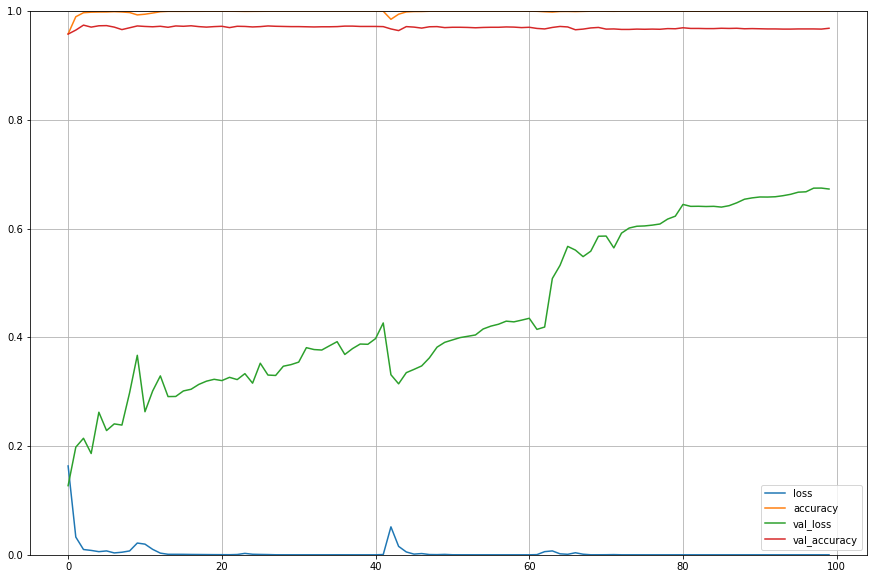

In [98]:
# Graph plot of train process model
pd.DataFrame(model_learn_imp.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Untuk improvement model kedepannya:
- Gunakan model lain selain LSTM (GRU, RNN) dengan parameter yang lebih kompleks untuk text classification
- Kombinasikan model tersebut dengan algoritma lain (misalkan CNN)
- Studi yang lebih detail tentang parameter yang tepat untuk digunakan tiap case (`optimizer`, `initializer`, `regularizer`, `pooling layer`, `convolutional layer`, banyak neurons optimal tiap layers, dan sebagainya)


---

## *`References`*
**Exploratory Data Analysis :**

>https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model
https://www.kaggle.com/code/aashita/word-clouds-of-various-shapes/notebook
(https://www.kaggle.com/code/junedism/spaceship-titanic-exploratory-data-analysis)

**Data Preprocessing Text :** 

>https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
https://keras.io/api/preprocessing/text/#one_hot
https://www.analyticsvidhya.com/blog/2021/11/an-introduction-to-stemming-in-natural-language-processing/
https://www.datacamp.com/tutorial/wordcloud-python
https://coderpad.io/regular-expression-cheat-sheet/
https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39
https://www.goeduhub.com/10643/practical-approach-word-embedding-simple-embedding-example
https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences
https://colab.research.google.com/drive/1quIzzM4444f41LvSGMIDzNhZbBggUFZo#scrollTo=UbOU7Zh_RmXK (Materi dari kak fahmi)

**Modelling :** 

>https://www.tensorflow.org/tfx/tutorials/transform/census
https://www.kaggle.com/code/sardiirfansyah/tensorflow-input-pipeline-prefetch-tf-data
https://stackoverflow.com/questions/46444018/meaning-of-buffer-size-in-dataset-map-dataset-prefetch-and-dataset-shuffle
https://medium.com/@ashraf.dasa/shuffle-the-batched-or-batch-the-shuffled-this-is-the-question-34bbc61a341f
https://keras.io/api/layers/core_layers/embedding/
https://www.baeldung.com/cs/bidirectional-vs-unidirectional-lstm
https://www.kaggle.com/code/fanyuanlai/textcnn
https://www.kaggle.com/code/tanvikurade/fake-job-postings-using-bidirectional-lstm/notebook
https://medium.com/deep-learning-with-keras/lstm-understanding-the-number-of-parameters-c4e087575756
https://medium.com/geekculture/10-hyperparameters-to-keep-an-eye-on-for-your-lstm-model-and-other-tips-f0ff5b63fcd4
https://towardsdatascience.com/lstm-framework-for-univariate-time-series-prediction-d9e7252699e
https://medium.com/@kangeugine/long-short-term-memory-lstm-concept-cb3283934359
https://medium.com/ai-ml-at-symantec/should-we-abandon-lstm-for-cnn-83accaeb93d6
https://analyticsindiamag.com/guide-to-text-classification-using-textcnn/
https://keras.io/api/layers/pooling_layers/max_pooling1d/